# PCA (principal Component Analysis)

- PCA는 Karl Pearson이 1901년에 발명한 통계 기법으로 직교 변환을 사용하여 변수 집합을 주성분이라고 하는 선형적으로 상관되지 않은 변수 집합으로 매핑
- PCA는 원래 데이터세트의 공분산 행렬의 SVD(Singular Value Decomposition)를 기반으로 한다. 이러한 분해(decomposition)의 고유 벡터는 회전변환 행렬(rotation maxtrix)로 사용된다. 고유 벡터는 설명된 분산에 따라 내림차순으로 회전변환 행렬에 배열.
- PCA는 단순한 공간 변환, 차원 감소 및 스펙트럼 정보로부터의 혼합물 분리에 이르기까지 다양한 응용 분야에서 강력한 기술로 사용

- "ChurnData.csv"의 각 행은 고객을 나타내고 각 열은 고객의 속성 표시
- 데이터 세트에는 지난 달에 탈회한 고객에 대한 정보가 포함(Churn 1.0 - 탈회, 0.0 - 유지)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data/ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.shape   # 28차원 데이터

(200, 28)

In [5]:
X = df.loc[:, df.columns[:-1]].values
X.shape

(200, 27)

In [6]:
y = df['churn'].values
y.shape

(200,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 27), (40, 27), (160,), (40,))

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## PCA 적용 전 Logistic Regression

- PCA 적용 후의 결과와 비교 목적

X_train을 이용하여 Logistic Regression

In [9]:
X_train.shape, y_train.shape

((160, 27), (160,))

In [12]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0.])

In [13]:
y_test

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0.])

test set 예측

In [14]:
accuracy_score(y_test, y_pred)

0.775

## PCA 적용

- 27개의 feature를 2개로 차원 축소

- components_
    - array, shape (n_components, n_features)
    - n_feature dimension 공간에서의 주성분 축
    - data의 분산을 최대로 보존하는 방향
    - explained_variance_에 순서대로 정렬되어 있음
- explained_variance_
    - shape (n_components,)
    - 선택한 각 구성 요소에서 설명하는 분산의 양
- explained_variance_ratio_
    - shape (n_components,)
    - 선택한 각 구성 요소가 설명하는 분산의 백분율입니다.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 2개로 축소

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape, X_test_pca.shape

((160, 2), (40, 2))

차원 축소된 X_train_pca를 이용하여 Logistic Regression

학습된 model을 이용하여 test set 예측

In [18]:
clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

accuracy_score(y_test, y_pred)   # 정확도가 크게 변하지 않았음

0.725

## 차원 축소된 churn data 시각화
- 27개의 feature가 2개의 PCA로 자원 축소 되었으므로 평면 상의 시각화 가능

In [22]:
# Boolean Indexing

X_train_pca[y_train == 0, 0]   # 첫 번째 성분만 골라냄

array([-1.79076917, -0.61237011,  3.14274902,  0.83536207, -1.00524582,
       -2.74051125, -0.03721812,  3.72909809, -1.26671594, -0.29407251,
       -1.45701489, -1.77550846, -0.60149911, -0.24024344,  4.31957132,
       -0.21469761, -1.38798075, -2.80720298, -1.70102387, -2.61729981,
       -2.83179803, -3.53053113, -2.26146637, -3.75154807,  1.66744746,
        0.71830379,  0.4457922 , -2.13856707,  3.62415703, -2.81475017,
       -2.10851873, -1.39486117, -0.53420864,  0.12728823,  1.41485769,
       -0.63740695, -0.419945  ,  1.96121912,  2.83359744, -0.35817737,
       -0.1095446 , -1.96430127, -1.36645957, -0.58025849, -0.61683404,
       -1.41109867, -1.94619553,  7.50901912, -0.29767183,  3.50128108,
       -0.98201839,  2.63393943,  0.18820596, -3.18641698, -1.66575727,
        7.21136375, -2.19627229,  0.56027536,  1.80055053,  0.13212072,
       -0.55425418,  4.50524342,  1.60634893, -0.40466461,  2.71499856,
       -3.62383371,  1.71240769, -3.53293638,  0.53579865,  1.46

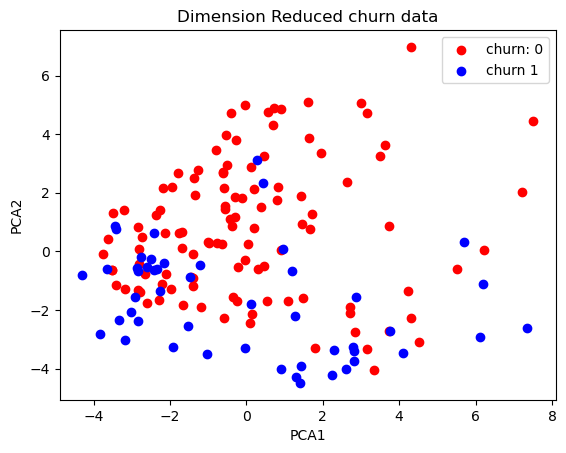

In [20]:
X1, X2 = X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1]
plt.scatter(X1, X2, color='r', label='churn: 0')

X1, X2 = X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1]
plt.scatter(X1, X2, color='b', label="churn 1")

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.title("Dimension Reduced churn data")
plt.show()